In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

import tensorflow as tf
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.layers import Dense,Input,Dropout, GlobalAveragePooling2D,Flatten,Conv2D, BatchNormalization,Activation,MaxPooling2D
from keras.models import load_model,Model,Sequential
from keras.optimizers import Adam,SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 

In [2]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 83.6/83.6 kB 138.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=571bc99611189cf5a425559ef54c7741e70fd88e067e165022c7dc61d5092215
  Stored in directory: c:\users\mpaga\appdata\local\pip\cache\wheels\b2\3d\88\839f363f3ce6b71785b8a95627cd52cb5359e54aba76a7ab76
Successfully built kaggle


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset")


100%|██████████| 121M/121M [01:01<00:00, 2.07MB/s] 


In [5]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [18]:
pic_size=48
folder_path='C:\\Users\\mpaga\\Desktop\\Datasets\\Untitled Folder\\face-expression-recognition-dataset\\images\\'


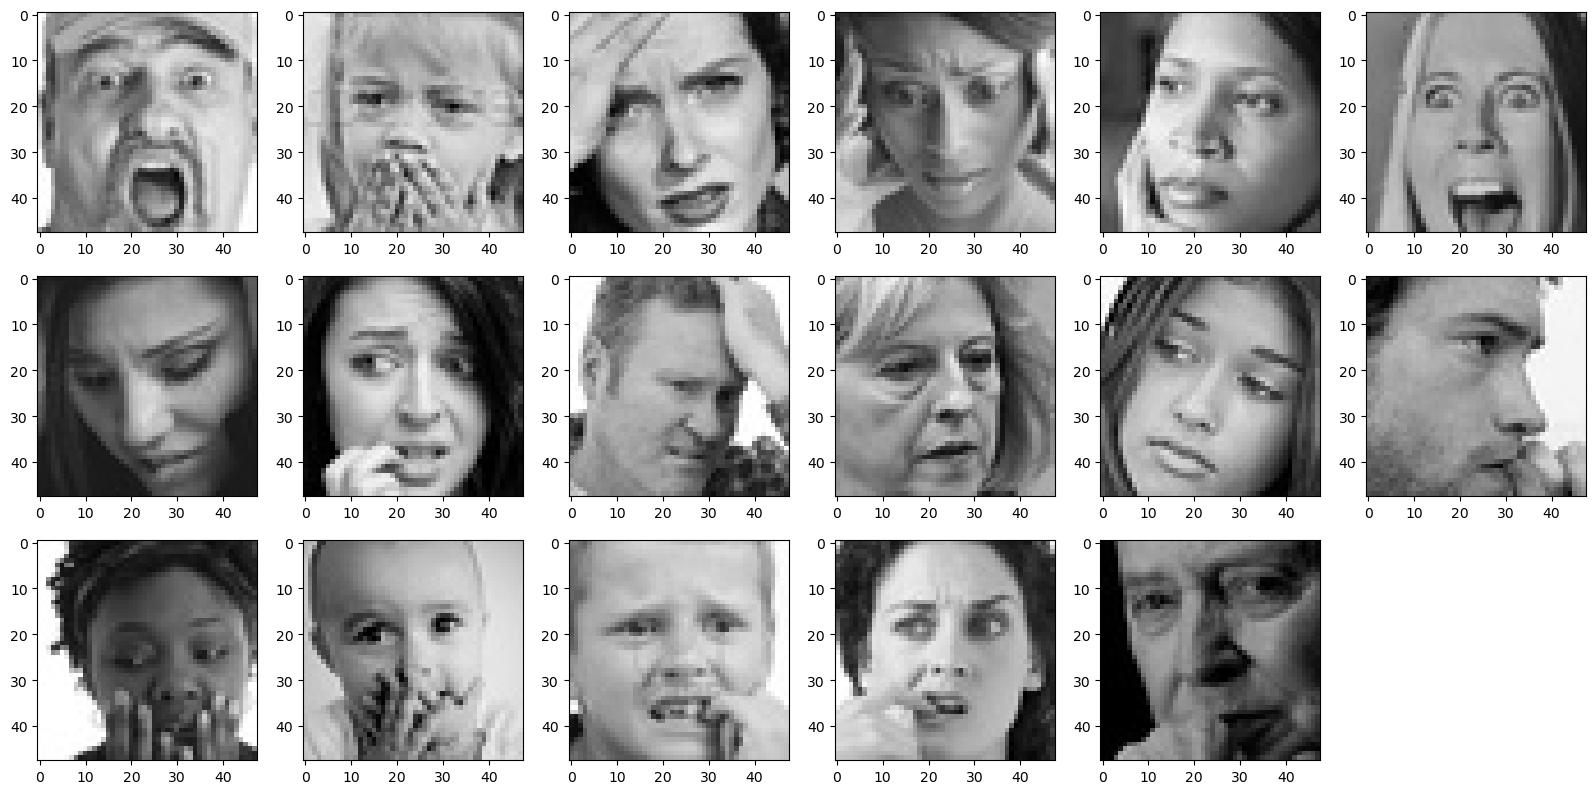

In [23]:
expression='fear'

plt.figure(figsize=(20,20))
for i in range(1,18,1):
    plt.subplot(6,6,i)
    img=load_img(folder_path+'train/'+expression+"/"+
                os.listdir(folder_path + 'train/' + expression)[i],target_size=(pic_size,pic_size))
    plt.imshow(img)
plt.show()

In [24]:
batch_size = 128

datagen_train= ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)
datagen_val = ImageDataGenerator(rescale= 1.0/255)

train_set = datagen_train.flow_from_directory(folder_path+'train',target_size=(pic_size,pic_size),color_mode='grayscale',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set= datagen_val.flow_from_directory(folder_path+'validation',
                                            target_size=(pic_size,pic_size),
                                            color_mode='grayscale',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [26]:
no_of_classes=7
model=Sequential()

#1st CNN Layer
model.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,1)) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN Layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

#3rd CNN Layer
model.add(Conv2D(512,(3,3), padding=('same')))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN Layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Final Output Layer
model.add(Dense(no_of_classes, activation='softmax'))


opt=Adam(learning_rate=.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [28]:
# number of epochs to train the NN
epochs = 150

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint(filepath='./modelbestweights.h5', mode='max', monitor='val_accuracy', verbose=1, save_best_only
                           =True)



callbacks_list=[checkpoint]


model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=.001),metrics=['accuracy'])

In [29]:
history=model.fit_generator(train_set,
                           steps_per_epoch=train_set.n//train_set.batch_size,
                           epochs=epochs,
                           validation_data=test_set,
                           validation_steps=test_set.n//test_set.batch_size,
                           callbacks=callbacks_list)

C:\Users\mpaga\AppData\Local\Temp\ipykernel_33212\353808276.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set,


Epoch 1/150



225/225 [==============================] - ETA: 0s - loss: 1.9019 - accuracy: 0.2502
Epoch 1: val_accuracy improved from -inf to 0.26832, saving model to .\modelbestweights.h5


C:\Users\mpaga\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 317s 1s/step - loss: 1.9019 - accuracy: 0.2502 - val_loss: 2.0283 - val_accuracy: 0.2683
Epoch 2/150
225/225 [==============================] - ETA: 0s - loss: 1.6433 - accuracy: 0.3520
Epoch 2: val_accuracy improved from 0.26832 to 0.33622, saving model to .\modelbestweights.h5
225/225 [==============================] - 329s 1s/step - loss: 1.6433 - accuracy: 0.3520 - val_loss: 2.1038 - val_accuracy: 0.3362
Epoch 3/150
225/225 [==============================] - ETA: 0s - loss: 1.4716 - accuracy: 0.4283
Epoch 3: val_accuracy improved from 0.33622 to 0.44588, saving model to .\modelbestweights.h5
225/225 [==============================] - 305s 1s/step - loss: 1.4716 - accuracy: 0.4283 - val_loss: 1.4490 - val_accuracy: 0.4459
Epoch 4/150
225/225 [==============================] - ETA: 0s - loss: 1.3649 - accuracy: 0.4738
Epoch 4: val_accuracy did not improve from 0.44588
225/225 [==============================] - 325s 1s/step - loss: 1.3649 - a

Epoch 29/150
225/225 [==============================] - ETA: 0s - loss: 0.9637 - accuracy: 0.6329
Epoch 29: val_accuracy did not improve from 0.64375
225/225 [==============================] - 498s 2s/step - loss: 0.9637 - accuracy: 0.6329 - val_loss: 1.0684 - val_accuracy: 0.5947
Epoch 30/150
225/225 [==============================] - ETA: 0s - loss: 0.9591 - accuracy: 0.6381
Epoch 30: val_accuracy did not improve from 0.64375
225/225 [==============================] - 482s 2s/step - loss: 0.9591 - accuracy: 0.6381 - val_loss: 0.9732 - val_accuracy: 0.6389
Epoch 31/150
225/225 [==============================] - ETA: 0s - loss: 0.9531 - accuracy: 0.6401
Epoch 31: val_accuracy did not improve from 0.64375
225/225 [==============================] - 479s 2s/step - loss: 0.9531 - accuracy: 0.6401 - val_loss: 1.1804 - val_accuracy: 0.5521
Epoch 32/150
225/225 [==============================] - ETA: 0s - loss: 0.9423 - accuracy: 0.6426
Epoch 32: val_accuracy did not improve from 0.64375
225/

Epoch 58/150
225/225 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.6979
Epoch 58: val_accuracy did not improve from 0.64716
225/225 [==============================] - 1183s 5s/step - loss: 0.8013 - accuracy: 0.6979 - val_loss: 1.0222 - val_accuracy: 0.6193
Epoch 59/150
225/225 [==============================] - ETA: 0s - loss: 0.7905 - accuracy: 0.7019
Epoch 59: val_accuracy did not improve from 0.64716
225/225 [==============================] - 217s 965ms/step - loss: 0.7905 - accuracy: 0.7019 - val_loss: 0.9865 - val_accuracy: 0.6389
Epoch 60/150
225/225 [==============================] - ETA: 0s - loss: 0.7964 - accuracy: 0.6965
Epoch 60: val_accuracy did not improve from 0.64716
225/225 [==============================] - 256s 1s/step - loss: 0.7964 - accuracy: 0.6965 - val_loss: 1.1223 - val_accuracy: 0.5950
Epoch 61/150
225/225 [==============================] - ETA: 0s - loss: 0.7846 - accuracy: 0.7011
Epoch 61: val_accuracy did not improve from 0.64716


Epoch 87/150
225/225 [==============================] - ETA: 0s - loss: 0.6974 - accuracy: 0.7380
Epoch 87: val_accuracy did not improve from 0.67386
225/225 [==============================] - 209s 928ms/step - loss: 0.6974 - accuracy: 0.7380 - val_loss: 0.9837 - val_accuracy: 0.6567
Epoch 88/150
225/225 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.7358
Epoch 88: val_accuracy did not improve from 0.67386
225/225 [==============================] - 215s 954ms/step - loss: 0.6965 - accuracy: 0.7358 - val_loss: 0.9768 - val_accuracy: 0.6663
Epoch 89/150
225/225 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7395
Epoch 89: val_accuracy did not improve from 0.67386
225/225 [==============================] - 247s 1s/step - loss: 0.6900 - accuracy: 0.7395 - val_loss: 1.2140 - val_accuracy: 0.5943
Epoch 90/150
225/225 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.7444
Epoch 90: val_accuracy did not improve from 0.6738

Epoch 116/150
225/225 [==============================] - ETA: 0s - loss: 0.6192 - accuracy: 0.7672
Epoch 116: val_accuracy did not improve from 0.68409
225/225 [==============================] - 272s 1s/step - loss: 0.6192 - accuracy: 0.7672 - val_loss: 1.1521 - val_accuracy: 0.6121
Epoch 117/150
225/225 [==============================] - ETA: 0s - loss: 0.6190 - accuracy: 0.7698
Epoch 117: val_accuracy did not improve from 0.68409
225/225 [==============================] - 264s 1s/step - loss: 0.6190 - accuracy: 0.7698 - val_loss: 1.1457 - val_accuracy: 0.6357
Epoch 118/150
225/225 [==============================] - ETA: 0s - loss: 0.6134 - accuracy: 0.7722
Epoch 118: val_accuracy did not improve from 0.68409
225/225 [==============================] - 224s 998ms/step - loss: 0.6134 - accuracy: 0.7722 - val_loss: 1.0811 - val_accuracy: 0.6430
Epoch 119/150
225/225 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.7676
Epoch 119: val_accuracy did not improve from 0

Epoch 145/150
225/225 [==============================] - ETA: 0s - loss: 0.5641 - accuracy: 0.7896
Epoch 145: val_accuracy did not improve from 0.68409
225/225 [==============================] - 313s 1s/step - loss: 0.5641 - accuracy: 0.7896 - val_loss: 1.3722 - val_accuracy: 0.5946
Epoch 146/150
225/225 [==============================] - ETA: 0s - loss: 0.5567 - accuracy: 0.7916
Epoch 146: val_accuracy did not improve from 0.68409
225/225 [==============================] - 298s 1s/step - loss: 0.5567 - accuracy: 0.7916 - val_loss: 1.1629 - val_accuracy: 0.6347
Epoch 147/150
225/225 [==============================] - ETA: 0s - loss: 0.5584 - accuracy: 0.7935
Epoch 147: val_accuracy did not improve from 0.68409
225/225 [==============================] - 305s 1s/step - loss: 0.5584 - accuracy: 0.7935 - val_loss: 1.3786 - val_accuracy: 0.5777
Epoch 148/150
225/225 [==============================] - ETA: 0s - loss: 0.5569 - accuracy: 0.7916
Epoch 148: val_accuracy did not improve from 0.68

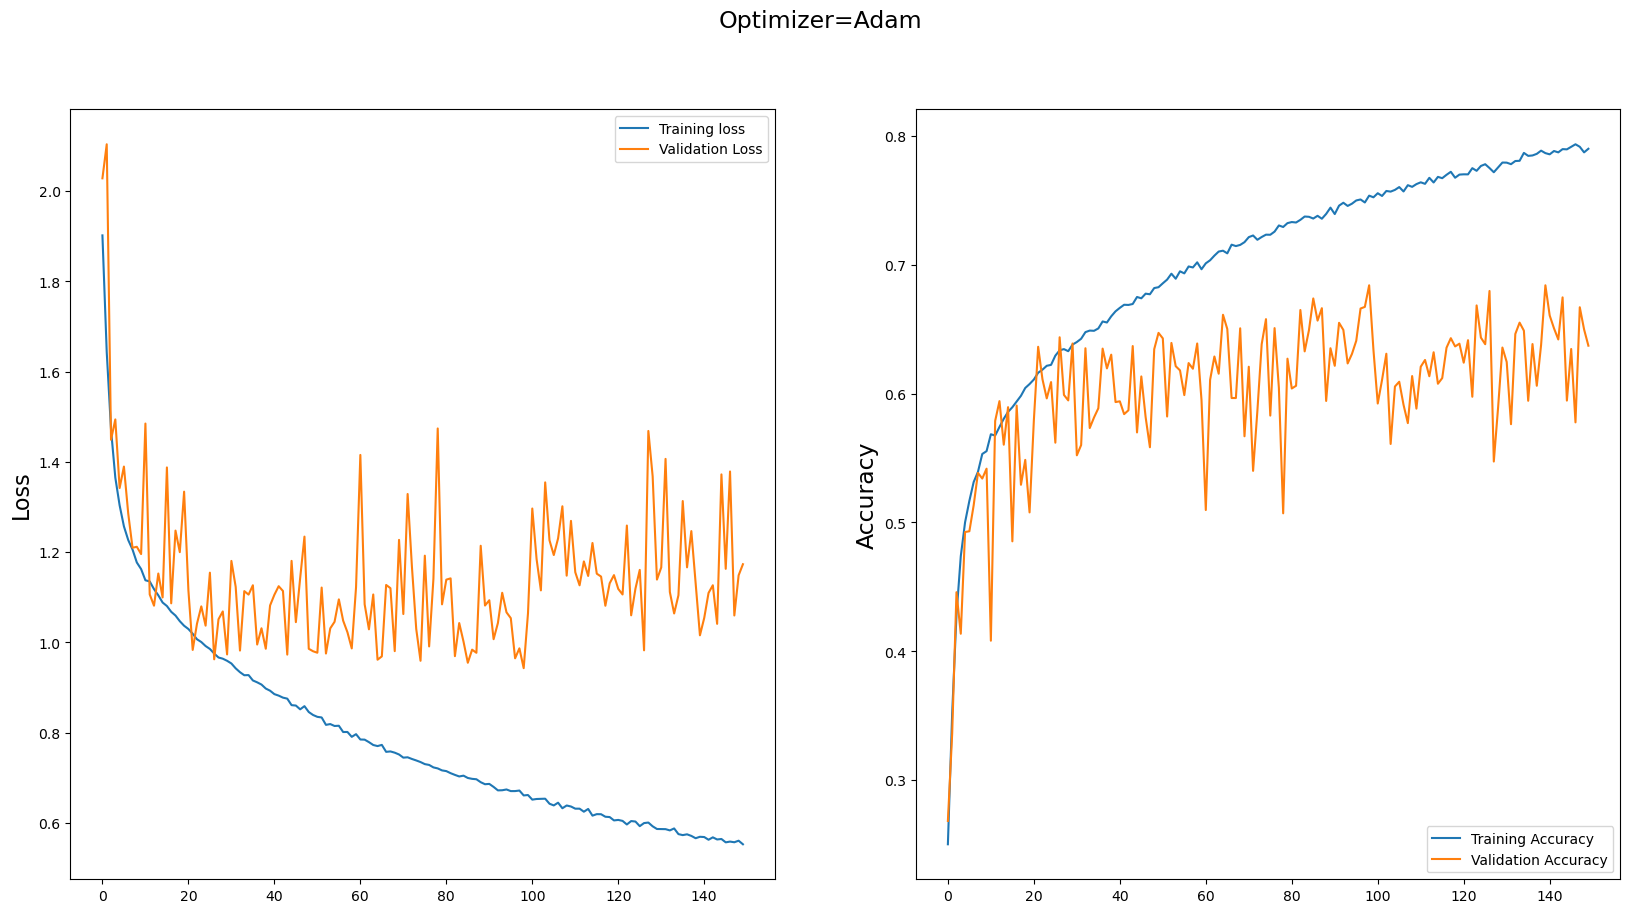

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer=Adam', fontsize=17)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=17)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [31]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
op = dict(zip( train_set.class_indices.values(), train_set.class_indices.keys()))

In [47]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'C:\Users\mpaga\Desktop\Datasets\Untitled Folder\haarcascade_frontalface_default.xml')
classifier =load_model(r'C:\Users\mpaga\Desktop\Datasets\Untitled Folder\modelbestweights.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step
